# 2時間後のGBP/USDの値段を予測する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

from lib import lib

In [3]:
li_currency = ["USDJPY","EURJPY","EURUSD","GBPJPY","CADJPY","CHFJPY","GBPUSD","USDCHF","SEKJPY","NOKJPY",
"EURGBP","USDCAD","TRYJPY","ZARJPY","MXNJPY","TRYUSD","EURTRY","RUBJPY","AUDJPY","NZDJPY",
"AUDUSD","NZDUSD","EURAUD","GBPAUD","AUDCAD","EURNZD","AUDNZD","CNYJPY","HKDJPY","SGDJPY"]

In [8]:
CURRENCY = "GBPUSD"
PERIOD = 12 # 予測の間隔
PERIOD2 = 6 # 変化の間隔
PIP = 0.0005

In [9]:
target, day = lib.makeTarget(CURRENCY)
dayweek = list(map(lib.dayweek,day))
dayhour = list(map(lib.dayhour,day))

In [10]:
data = lib.makeData(li_currency).values
diffs = lib.diffData(data,PERIOD2)
data = data[PERIOD2:]
data = np.concatenate([data,diffs],1)[max(PERIOD-PERIOD2,0):]

In [11]:
target = lib.diffTarget(target,PERIOD)[max(PERIOD2-PERIOD,0):]

In [12]:
len(data)

6773

In [13]:
len(target)

6773

In [14]:
size = len(target)
dayweek = dayweek[max(PERIOD2,PERIOD):]
dayhour = dayhour[max(PERIOD2,PERIOD):]

In [15]:
data, target = lib.checkDay(data,target,dayweek,dayhour,size)
data = np.array(data)

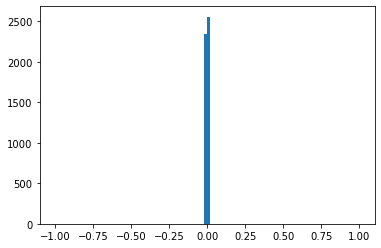

In [16]:
plt.hist(target, range=(-1, 1), bins=100);

In [17]:
target2 = [lib.highlow(i,PIP) for i in target]
target3 = [lib.highlow2(i,PIP) for i in target]
target4 = [lib.highlow3(i,PIP) for i in target]

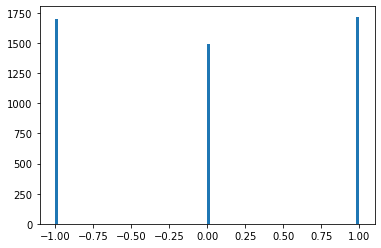

In [18]:
plt.hist(target2, range=(-1, 1), bins=100);

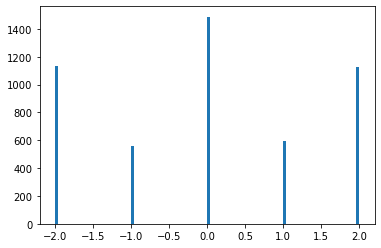

In [19]:
plt.hist(target3, range=(-2, 2), bins=100);

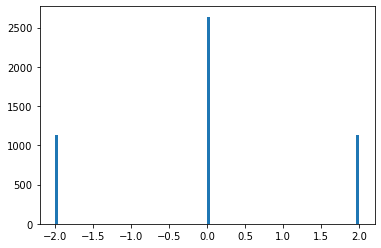

In [20]:
plt.hist(target4, range=(-2, 2), bins=100);

# データ成型は終了
## 入力：［注文状況］→　出力：一時間後にUSD/JPYが±0.1変化するかどうか

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 多層パーセプトロンで予測を行う

In [23]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4256619144602851
[[ 68 100  33]
 [ 29  77  31]
 [  9  80  64]]


In [24]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.384928716904277
[[71 10 26  1 25]
 [23  4 18  0 23]
 [43  1 46  0 47]
 [ 7  1 25  0 28]
 [ 3  2 19  0 68]]


In [25]:
clf = MLPClassifier(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=300, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.6
[[ 57  35   2]
 [ 44 113   4]
 [  2  33  10]]


0.0006157562891186246
[[1.         0.14563502]
 [0.14563502 1.        ]]


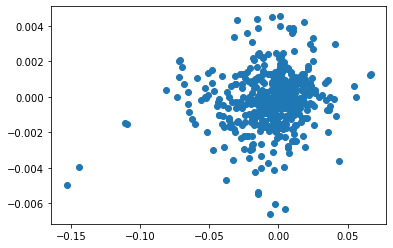

In [26]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.0007801078819604279
[[ 1.         -0.11232884]
 [-0.11232884  1.        ]]


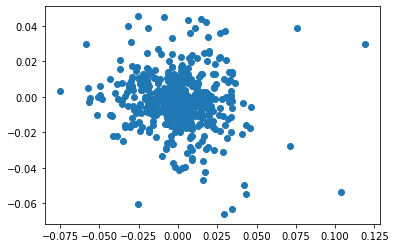

In [27]:
clf = MLPRegressor(hidden_layer_sizes = (128,128), solver = "sgd", max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

8.86922907675458e-07
[[1.         0.86158753]
 [0.86158753 1.        ]]


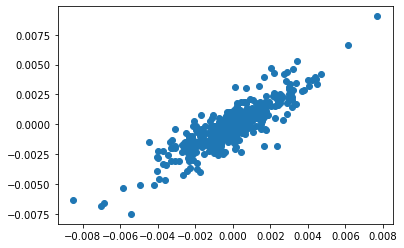

In [28]:
clf = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## サポートベクターマシンで予測を行う

In [29]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.42362525458248473
[[ 76 102  23]
 [ 30  88  19]
 [ 41  68  44]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.319755600814664
[[27 15 67 11 13]
 [ 9  4 43  4  8]
 [22  2 84 13 16]
 [ 6  1 40  7  7]
 [ 7 10 30 10 35]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
clf = svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0,max_iter=10000)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.43380855397148677
[[ 55  53  25]
 [105 102  59]
 [ 13  23  56]]


C:\Users\Takumi Inui\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## ランダムフォレストで予測を行う

In [32]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4745417515274949
[[102  51  48]
 [ 52  36  49]
 [ 28  30  95]]


In [33]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4154786150712831
[[70  2 46  0 15]
 [19  0 28  1 20]
 [29  0 79  0 29]
 [ 6  0 37  0 18]
 [ 4  0 33  0 55]]


In [34]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 40)
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5763747454175153
[[ 19 111   3]
 [  5 244  17]
 [  0  72  20]]


1.5949318122864366e-06
[[1.         0.71699638]
 [0.71699638 1.        ]]


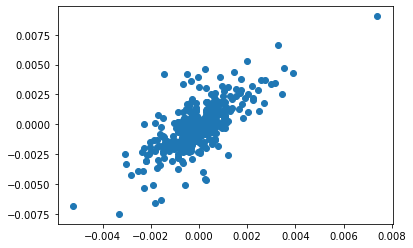

In [35]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

0.00015821191530147438
[[1.         0.72206712]
 [0.72206712 1.        ]]


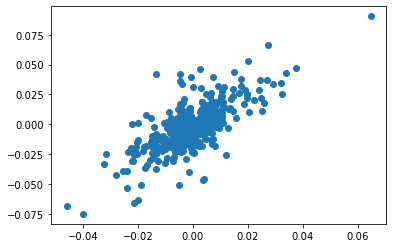

In [36]:
clf = RandomForestRegressor(n_estimators=9, max_depth=9, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)

## Adaboostで予測を行う

In [37]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target2, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.45417515274949083
[[89 87 25]
 [30 46 61]
 [18 47 88]]


In [38]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target3, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.4134419551934827
[[80  4 44  2  3]
 [24  1 37  2  4]
 [37  5 71  5 19]
 [13  2 29  6 11]
 [ 8  4 34  1 45]]


In [39]:
clf = AdaBoostClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target4, test_size=0.1, random_state=0,shuffle=False)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(correct, predict))

0.5682281059063137
[[102  31   0]
 [104 146  16]
 [ 14  47  31]]


8.857803010335598e-05
[[1.         0.87379388]
 [0.87379388 1.        ]]


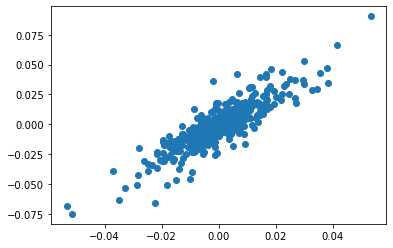

In [40]:
clf = GradientBoostingRegressor(random_state=1, n_estimators=100, max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(data, [i * 10 for i in target], test_size=0.1, random_state=0)
clf.fit(X_train, y_train)
correct = np.array(y_test)
predict = clf.predict(X_test)
print(mean_squared_error(predict,correct))
print(np.corrcoef(predict, correct))
plt.scatter(predict, correct)